In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from nn.sdnn import DNN
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
style.use('ggplot')

In [4]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
data = np.genfromtxt('data/breast-cancer-wisconsin.data.txt', delimiter=',')
data.shape

(699, 11)

In [5]:
data = data[~np.isnan(data).any(axis=1)] # drop nans
data = data[:, 1:]                       # drop the id field
data.shape

(683, 10)

In [6]:
X = data[:, 0:-1]
y = data[:, -1:] # 2 or 4
X.shape, y.shape

((683, 9), (683, 1))

In [7]:
X[1]

array([ 5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.])

In [8]:
y = np.zeros([len(data), 2])
for i in range(0, len(data)):
    if data[i, -1] == 2:
        y[i, 0] = 0
        y[i, 1] = 1
    else:
        y[i, 0] = 1
        y[i, 1] = 0

In [9]:
X = preprocessing.normalize(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [11]:
X_train[:3]

array([[0.28867513, 0.28867513, 0.28867513, 0.28867513, 0.57735027,
        0.28867513, 0.28867513, 0.28867513, 0.28867513],
       [0.76980036, 0.19245009, 0.19245009, 0.19245009, 0.38490018,
        0.19245009, 0.19245009, 0.19245009, 0.19245009],
       [0.28867513, 0.28867513, 0.28867513, 0.28867513, 0.28867513,
        0.28867513, 0.57735027, 0.28867513, 0.28867513]])

In [12]:
X.shape, y.shape

((683, 9), (683, 2))

In [13]:
N = DNN(shape=[9, 15, 19, 2])
N.train(X_train, y_train)

         Current function value: 0.026074
         Iterations: 200
         Function evaluations: 205
         Gradient evaluations: 205


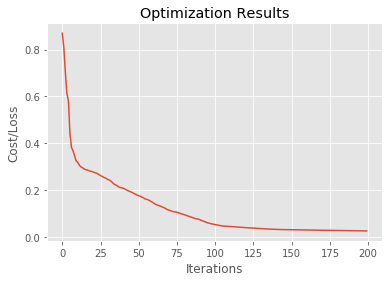

In [14]:
plt.plot(N.J)
plt.title('Optimization Results')
plt.xlabel('Iterations')
plt.ylabel('Cost/Loss')
plt.show()

In [15]:
N.compute_accuracy(X_test, y_test)

0.8716814159292036

In [16]:
N2 = DNN(shape=[9, 25, 35, 8, 2])
N2.train(X_train, y_train)

         Current function value: 0.016602
         Iterations: 200
         Function evaluations: 209
         Gradient evaluations: 209


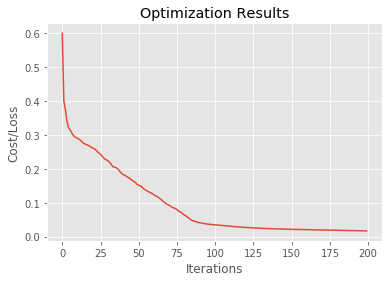

In [17]:
plt.plot(N2.J)
plt.title('Optimization Results')
plt.xlabel('Iterations')
plt.ylabel('Cost/Loss')
plt.show()

In [18]:
N2.compute_accuracy(X_test, y_test)

0.8495575221238938

In [19]:
# compare with sklearns implementation
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 19), random_state=1)

In [20]:
ymlp_train = y_train.argmax(axis=1)
ymlp_test = y_test.argmax(axis=1)

ymlp_train[:3], ymlp_test[:3]

(array([1, 1, 1], dtype=int64), array([1, 1, 1], dtype=int64))

In [21]:
clf.fit(X_train, ymlp_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 19), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [22]:
accuracy_score(ymlp_test, clf.predict(X_test)), N.compute_accuracy(X_test, y_test)

(0.8893805309734514, 0.8716814159292036)

In [23]:
np.round(clf.predict_proba(X_test), 3)[:10]

array([[0.977, 0.023],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.001, 0.999],
       [0.   , 1.   ],
       [0.848, 0.152],
       [0.001, 0.999],
       [0.004, 0.996],
       [0.17 , 0.83 ]])

In [24]:
np.round(N.y_hat, 2)[:10]

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.77, 0.23]])

In [25]:
np.round(clf.coefs_[0], 2)

array([[-0.08,  0.54, -0.84, -0.74,  0.7 , -0.48, -1.24, -0.15, -0.1 ,
         0.04, -1.19,  0.29,  0.63,  0.81, -0.47],
       [ 0.17,  0.43, -0.44, -0.54,  1.04,  0.19, -0.56, -0.19,  0.19,
         0.38, -0.84,  1.01,  4.46, -1.79,  0.38],
       [-0.4 ,  1.8 ,  0.08, -0.28,  0.35, -0.29, -0.28,  0.33, -0.48,
         0.25, -0.74,  0.27,  2.15,  1.25, -0.4 ],
       [-0.05,  1.48, -0.53, -0.45, -0.12, -0.54, -0.27, -0.29, -0.23,
        -0.01, -1.1 , -0.04,  1.18,  0.6 ,  0.2 ],
       [-0.4 ,  0.38, -0.01, -0.41,  1.34, -0.08, -0.09,  0.01,  0.44,
         0.09, -0.06, -1.58, -0.86, -0.74, -0.1 ],
       [-0.33, -2.31, -0.53,  0.07,  5.39,  0.2 , -0.13,  0.25, -0.15,
        -0.23, -1.22,  0.45,  3.43, -0.53,  0.12],
       [-0.39,  1.73, -0.33, -0.36, -0.79, -0.37,  0.25,  0.07, -0.5 ,
         0.12, -1.02,  0.04, -2.05,  2.1 ,  0.41],
       [ 0.12,  0.98, -0.13, -0.12, -0.44, -0.36, -0.52,  0.43,  0.2 ,
        -0.43, -0.83,  0.76,  2.21, -0.6 , -0.38],
       [-0.48, -1.69, -0

In [26]:
np.round(N.Ws[0], 2)

array([[-2.57, -0.  ,  0.5 , -0.89, -0.19,  3.39, -0.14,  3.79,  0.12,
        -0.39,  0.1 ,  0.8 ,  2.01, -0.11,  0.29],
       [-1.93,  0.36,  0.09, -0.99,  0.14, -0.07,  1.35, -1.67,  0.63,
        -0.41, -0.27,  0.83, -1.67, -0.8 ,  0.36],
       [ 1.51,  0.28, -0.61, -3.32, -0.44,  0.29, -0.87, -0.84,  0.15,
         0.15,  0.19,  0.07, -0.11, -0.33,  0.98],
       [-0.81,  1.32,  0.9 ,  2.26, -0.53,  1.47,  2.65, -0.21,  0.47,
        -0.3 ,  0.06,  0.88,  0.46, -0.26,  1.4 ],
       [ 3.03,  1.08, -0.05,  2.36, -0.27, -0.31,  0.53,  0.35,  1.09,
        -0.3 , -0.36, -1.15,  0.35, -0.17,  0.71],
       [-0.32,  1.14, -0.47,  1.3 ,  0.14, -1.35, -1.  , -0.61, -1.24,
        -0.43, -0.04,  1.13, -3.11, -0.23, -2.1 ],
       [ 0.46,  0.39, -0.01, -0.72, -0.17, -0.74, -0.12, -1.27,  0.7 ,
         0.1 , -0.33,  0.16,  1.86, -0.27, -1.67],
       [-0.53,  0.83, -2.71, -0.82, -0.17, -1.06,  0.36, -0.72, -0.24,
        -0.17, -0.45,  1.04,  0.61, -0.18, -0.19],
       [ 0.88, -3.34, -0